# Técnica de Classificação - Cross Validation

#### **Contextualização**

Neste projeto, trabalhamos com dados operacionais da empresa fictícia ProQuim, onde uma engenheira busca desenvolver um modelo preditivo capaz de identificar se o compressor da área 100 da planta está operando normalmente ou apresentando alguma condição anômala.

Ao longo de um ano, foram coletadas informações de sensores relacionados à operação dos compressores, incluindo:

* Temperatura

* Pressão

* Velocidade

* Vibração

Além desses dados, foi registrada também a condição operacional real de cada equipamento, servindo como rótulo para o problema de classificação binária.

O objetivo principal é construir um modelo utilizando a técnica de Máquina de Vetores de Suporte (SVM) da biblioteca scikit-learn, capaz de prever corretamente o estado operacional dos compressores com base nas variáveis medidas. Para avaliar a eficácia do modelo, utilizaremos as abordagens de validação cruzada k-fold e leave-one-out.

Os dados utilizados estão disponíveis no arquivo df_compressor.xlsx.

In [1]:
import pandas as pd

df = pd.read_excel('df_compressor.xlsx')

In [2]:
df.head()

,Temperatura,Pressao,Velocidade,Vibracao,Anomalia
0,45.599707,18.513293,130.852842,6.727030,0.0
1,77.289287,54.190095,123.489400,7.966814,0.0
2,65.259667,87.294584,453.127290,2.504679,0.0
3,57.926217,73.222489,124.773100,6.248741,0.0
4,33.581025,80.656115,135.974863,5.717460,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperatura  986 non-null    float64
 1   Pressao      986 non-null    float64
 2   Velocidade   986 non-null    float64
 3   Vibracao     986 non-null    float64
 4   Anomalia     986 non-null    float64
dtypes: float64(5)
memory usage: 39.2 KB


In [4]:
df.isnull().sum()

Temperatura    14
Pressao        14
Velocidade     14
Vibracao       14
Anomalia       14
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
print('The dataset has {} columns and {} rows'.format(df.shape[1], df.shape[0]))

The dataset has 5 columns and 986 rows


In [7]:
df.describe()

,Temperatura,Pressao,Velocidade,Vibracao,Anomalia
count,986.000000,986.000000,986.000000,986.000000,986.000000
mean,52.099539,50.864497,251.131367,4.894626,0.198783
std,16.074507,29.229588,145.404494,2.868781,0.399287
min,25.254761,0.321826,0.005817,0.006534,0.000000
25%,38.077562,24.141235,131.305399,2.415097,0.000000
50%,52.498859,52.036596,250.251179,4.840050,0.000000
75%,66.097433,76.102692,379.474013,7.377703,0.000000
max,79.984472,99.941373,498.910428,9.995577,1.000000


In [8]:
df.columns

Index(['Temperatura', 'Pressao', 'Velocidade', 'Vibracao', 'Anomalia'], dtype='object')

In [9]:
df['Anomalia'].value_counts()

Anomalia
0.0    790
1.0    196
Name: count, dtype: int64

In [10]:
print('Anomalia')
print('0 (ausância de anomalia) | número de amostras = {}'.format(df['Anomalia'].value_counts()[0]))
print('1 (existência de anomalia) | número de amostras = {}'.format(df['Anomalia'].value_counts()[1]))

Anomalia
0 (ausância de anomalia) | número de amostras = 790
1 (existência de anomalia) | número de amostras = 196


In [11]:
# Proporção entra as classes
prop_normal = df['Anomalia'].value_counts()[0]/df['Anomalia'].value_counts().sum()

prop_fail = df['Anomalia'].value_counts()[1]/df['Anomalia'].value_counts().sum()

print('0 (ausência de anomalia) = {}'.format(prop_normal*100))
print('1 (existência de anomalia) = {}'.format(prop_fail*100))

0 (ausência de anomalia) = 80.12170385395537
1 (existência de anomalia) = 19.878296146044626


In [12]:
# Separar as variáveis em features e target
X = df.drop(['Anomalia'], axis=1)
y = df[['Anomalia']].values.ravel()

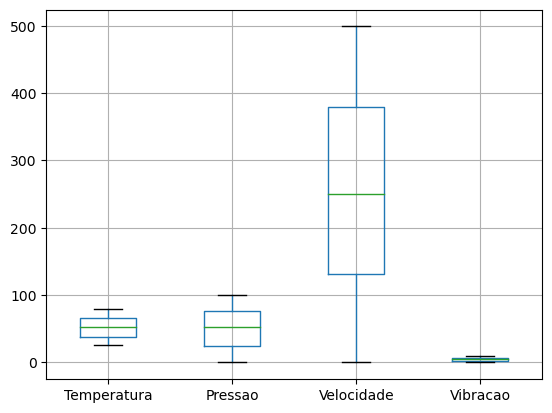

In [13]:
# Boxplot
import matplotlib.pyplot as plt
boxplot_x = X.boxplot()
plt.show()

In [14]:
# Normalização
from sklearn.preprocessing import MinMaxScaler

scaler_input = MinMaxScaler(feature_range=(-1,1))
scaler_input.fit(X)

X_norm = scaler_input.transform(X)

Não é necessário normalizar os dados de saída (y), uma vez que os dados de saída correspondem a 0 ou 1.

In [15]:
# Avaliação da performance do modelo de predição
from sklearn.svm import SVC
model = SVC(random_state=50)

## Cross Validation

* O método [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) disponível na biblioteca [scikit-learn](https://scikit-learn.org/stable/index.html) será utilizado para viabilizar implementar a técnica validação cruzada (*cross validation*) em linguagem de programação *Python*.

* O método [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) é uma ferramenta útil, uma vez que possibilita estimar os *k* valores de métrica de desempenho atrelados ao uso da técnica *k-fold cross validation*, assim como para a técnica *leave-one-out cross validation*.

* Para utilizar o método ```cross_val_score()``` na tarefa de classificação em evidência neste exemplo, faz-se necessário definir cinco parâmetros: o tipo de modelo de classificação cujo desempenho será avaliado (```estimator```); os dados de entrada de entrada (```X```); os dados de saída (```y```); a métrica de desempenho (```scoring```); e o número de partições *k* (```cv```). A seguir encontra-se evidenciado como esses parâmetros são definidos no método ```cross_val_score()```:

```python
        cross_val_score(estimator,
                         X,
                         y=None,                
                         scoring=None,
                         cv=None)
```

* Não é necessário definir nenhum parâmetro para estratificar as classes durante a execução da técnica *k-fold cross validation* e *leave-one-out cross validation* para modelos de classificação, uma vez que essa estratificação é realizada automaticamente pelo próprio método ```cross_val_score()```.

* Para utilizar o método ```cross_val_score()``` em tarefas de classificação a fim de implementar a técnica *leave-one-out cross validation*, é também necessário importar e utilizar o método [LeaveOneOut](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html#sklearn.model_selection.LeaveOneOut). Nessa situação, o método ```LeaveOneOut()``` deve ser igualado ao parâmetro ``cv`` ao utilizar o método ```cross_val_score()``` a fim de aplicar a técnica *leave-one-out cross validation*. O método ```LeaveOneOut()``` pode ser importado do seguinte modo:

```python
        from sklearn.model_selection import LeaveOneOut        
```


*k-fold cross validation*

* A técnica *k-fold cross validation* é usualmente empregada considerando o valor de k igual a 5 ou 10.

In [16]:
# Aplicando o k-fold cross-validation
from sklearn.model_selection import cross_val_score
import numpy as np

k = 10
scores = cross_val_score(model,
                         X_norm,
                         y,
                         scoring='accuracy',
                         cv=k,
                         verbose=2)

scores = np.round(scores, 4)

print(f'Cross-validation scores: {scores}')

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Cross-validation scores: [0.798  0.798  0.798  0.798  0.798  0.798  0.8061 0.8061 0.8061 0.8061]


In [17]:
# Obtendo o valor médio de erro e a variação
print(f'Média -> cross-validation scores: {round(scores.mean(), 2)}')
print(f'Desvio padrão -> cross-validation scores: {round(scores.std(),2)}')

Média -> cross-validation scores: 0.8
Desvio padrão -> cross-validation scores: 0.0


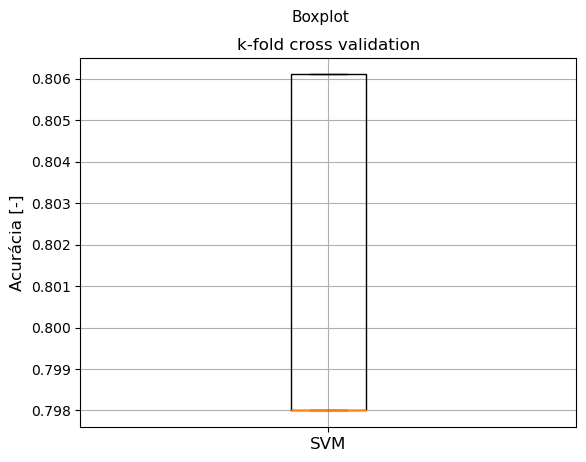

In [18]:
# Avaliando os valores de acurácia estimados via k-fold cross validation
# Diagrama de caixa ou boxplot
plt.boxplot(scores)
plt.suptitle('Boxplot', fontsize=11)
plt.title('k-fold cross validation', fontsize=12)
plt.ylabel('Acurácia [-]', fontsize=12)
plt.xticks(ticks=[1], labels=['SVM'], fontsize=12)
plt.grid(True)
plt.show()

*Leave-one-out cross validation*

* A técnica *Leave-one-out cross validation* corresponde ao uso do método de validação cruzada em que *k* é equivalente ao número de amostras (linhas) do banco de dados.

In [ ]:
from sklearn.model_selection import LeaveOneOut

k = LeaveOneOut()
scores = cross_val_score(model,
                         X_norm,
                         y,
                         scoring='accuracy',
                         cv=k,
                         verbose=0)

scores = np.round(scores, 4)

print('Cross-validation scores: {}'.format(scores))

In [ ]:
# Obtendo o valor médio de erro e a variação
print(f'Média -> cross-validation scores: {round(scores.mean(), 2)}')
print(f'Desvio padrão -> cross-validation scores: {round(scores.std(),2)}')

In [ ]:
# Avaliando os valores de acurácia estimados via k-fold cross validation
# Diagrama de caixa ou boxplot
plt.boxplot(scores)
plt.suptitle('Boxplot', fontsize=11)
plt.title('k-fold cross validation', fontsize=12)
plt.ylabel('Acurácia [-]', fontsize=12)
plt.xticks(ticks=[1], labels=['SVM'], fontsize=12)
plt.grid(True)
plt.show()

**Considerações sobre a avaliação de performance do modelo de predição do tipo máquinan de vetores de suporte**

* As técnicas *k-fold cross validation* e *leave-one-out cross validation* resultaram em estimativas de performance (média das métricas de desempenho) é aproximadamente nulo, enquanto que o desvio padrão calculado e atrelado à tecnica *leave-one-out cross validation* é aproximadamente 0,4.
* Conforme esperado, o gráfico *boxplot* atrelado à aplicação da técnica *leave-one-out cross validation* evidencia apenas dois valores de acurácia: 0 ou 1.